In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('tom_jerry.jpg')

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
segmented = np.zeros_like(gray)

In [5]:
def region_growing(img, seed, thres):
    h, w = img.shape
    segmented = segmented = np.zeros_like(img)
    stack = [seed]
    visited = np.zeros_like(img)

    while stack:
        x, y = stack.pop()

        if visited[x, y]:
            continue

        visited[x, y] = True
        segmented[x, y] = 255

        for dx, dy in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
            nx, ny = x + dx, y + dy

            if 0 <= nx < h and 0 <= ny < w and not visited[nx, ny]:
                condition = abs(int(img[nx, ny]) - int(img[seed])) <= thres

                if condition:
                    stack.append( (nx, ny) )
    return segmented

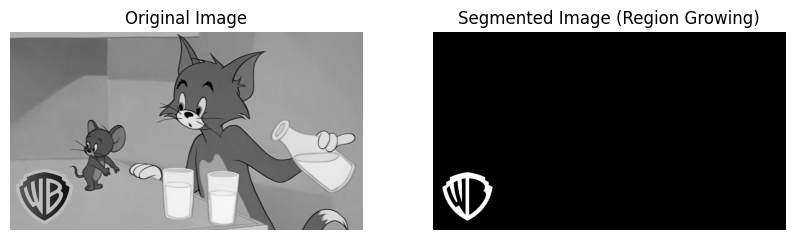

In [6]:
seed_point = (600, 100)
threshold = 70

segmented_image = region_growing(gray, seed_point, threshold)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image (Region Growing)")
plt.axis('off')

plt.show()

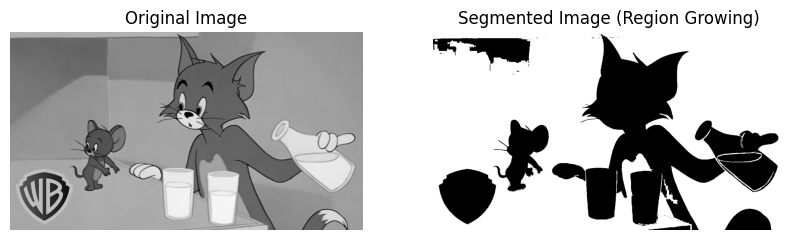

In [7]:
seed_point = (400, 250)
threshold = 40

segmented_image = region_growing(gray, seed_point, threshold)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image (Region Growing)")
plt.axis('off')

plt.show()

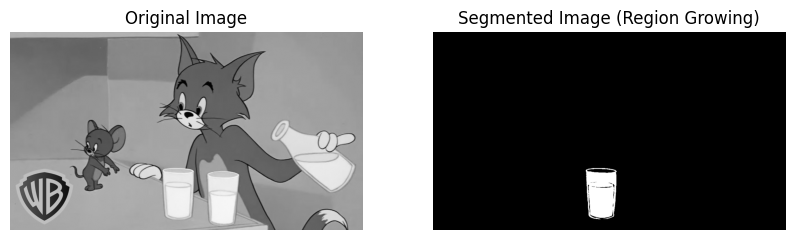

In [8]:
seed_point = (600, 600)
threshold = 40

segmented_image = region_growing(gray, seed_point, threshold)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image (Region Growing)")
plt.axis('off')

plt.show()